## Setup

In [1]:
!pip install python-dotenv google-api-python-client

from google.colab import drive
drive.mount('/content/drive')

import os
from dotenv import load_dotenv
load_dotenv("/content/drive/MyDrive/Professional/Portfolio/Fraud Detection/.envs/.env_github")
github_pat = os.getenv("GITHUB_PAT")
print(f"✅ GITHUB_PAT loaded successfully")
if not github_pat:
    raise ValueError("❌ Error: 'GITHUB_PAT' is missing or invalid in your .env file.")

!git clone https://{github_pat}@github.com/vmagdale2/Fraud-Detection.git

import sys
sys.path.append('/content/Fraud-Detection.git/')
%cd /content/Fraud-Detection/
!pwd
!ls

Mounted at /content/drive
✅ GITHUB_PAT loaded successfully
Cloning into 'Fraud-Detection'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 10 (delta 1), reused 5 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (10/10), 16.63 KiB | 8.32 MiB/s, done.
Resolving deltas: 100% (1/1), done.
/content/Fraud-Detection
/content/Fraud-Detection
Data  LICENSE  README.md


In [2]:
from sklearn.cluster import KMeans
import pandas as pd
import joblib

file_path = '/content/drive/My Drive/Professional/Portfolio/Fraud Detection/Data/Preprocessed/Variant II/X_scaled.pkl'

try:
    X_scaled = joblib.load(file_path)
    print("X_scaled loaded successfully!")
    print(X_scaled)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

X_scaled loaded successfully!
[[ 0.43445366 -1.46291765 -0.36604267 ...  1.          0.
   0.        ]
 [ 1.1270507  -1.33888985 -0.36604267 ...  0.          0.
   0.        ]
 [ 0.08815514 -1.27531273 -0.36604267 ...  1.          0.
   0.        ]
 ...
 [ 0.43445366  0.80381346 -0.36604267 ...  1.          0.
   0.        ]
 [ 1.1270507   1.70294079 -0.36604267 ...  0.          0.
   0.        ]
 [ 0.78075218  1.31241669 -0.36604267 ...  1.          0.
   0.        ]]


In [3]:
file_path_2 = '/content/drive/My Drive/Professional/Portfolio/Fraud Detection/Data/Preprocessed/Variant II/X_scaled_full.pkl'

try:
    X_scaled_full = joblib.load(file_path_2)
    print("X_scaled with fraud_bool column loaded successfully!")
    print(X_scaled_full)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

X_scaled with fraud_bool column loaded successfully!
[[ 0.43445366 -1.46291765 -0.36604267 ...  1.          0.
   0.        ]
 [ 1.1270507  -1.33888985 -0.36604267 ...  0.          0.
   0.        ]
 [ 0.08815514 -1.27531273 -0.36604267 ...  1.          0.
   0.        ]
 ...
 [ 0.43445366  0.80381346 -0.36604267 ...  1.          0.
   0.        ]
 [ 1.1270507   1.70294079 -0.36604267 ...  0.          0.
   0.        ]
 [ 0.78075218  1.31241669 -0.36604267 ...  1.          0.
   0.        ]]


In [4]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=29)
X_pca = pca.fit_transform(X_scaled)

# Clustering with K-Means

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

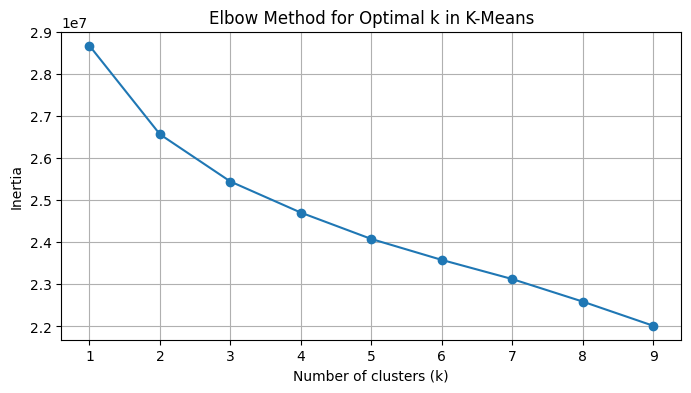

In [ ]:
inertia = []
K = range(1, 10)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8,4))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k in K-Means')
plt.grid(True)
plt.show()

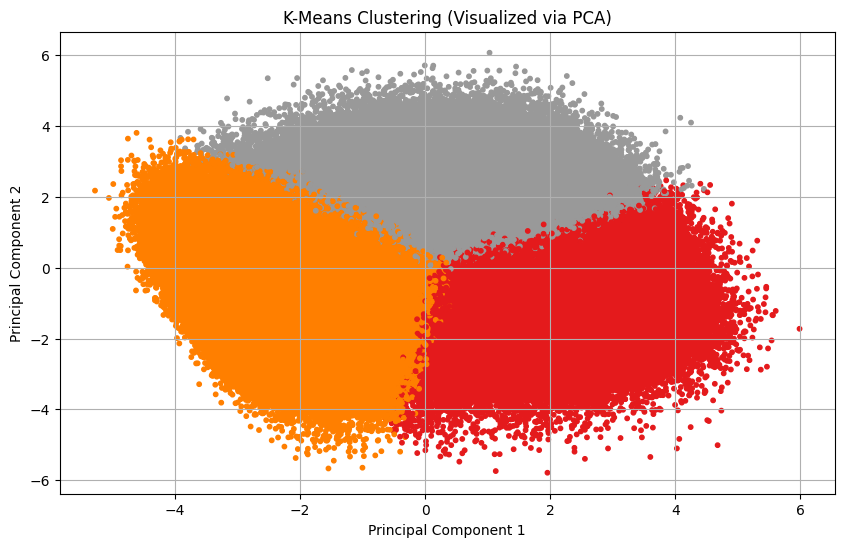

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=29)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='Set1', s=10)
plt.title('K-Means Clustering (Visualized via PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled_full)

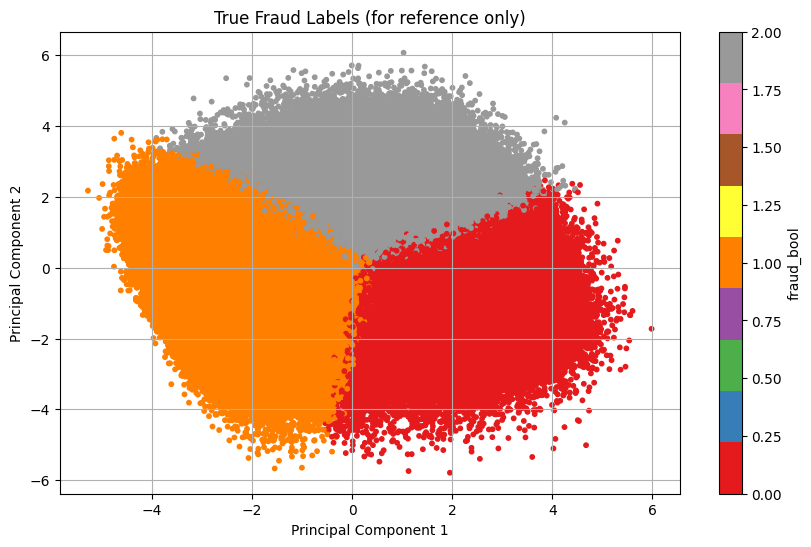

In [ ]:
pca = PCA(n_components=29)
X_pca_full = pca.fit_transform(X_scaled_full)

plt.figure(figsize=(10,6))
plt.scatter(X_pca_full[:, 0], X_pca_full[:, 1], c=kmeans_labels, cmap='Set1', s=10)
plt.title('True Fraud Labels (for reference only)')
plt.colorbar(label='fraud_bool')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# DBSCAN Clustering

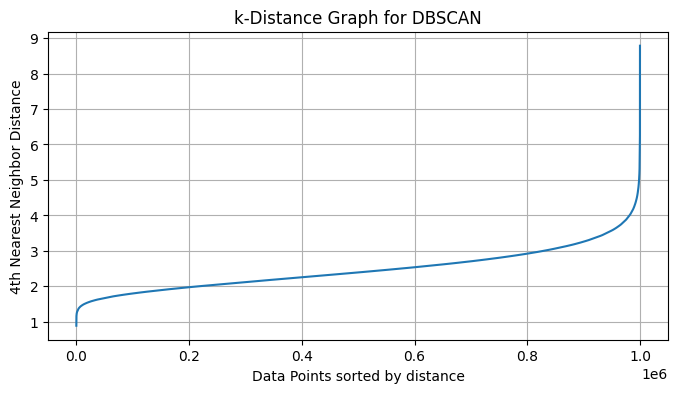

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

X_input = X_pca

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_input)
distances, indices = neighbors_fit.kneighbors(X_input)

distances = np.sort(distances[:, 4])
plt.figure(figsize=(8,4))
plt.plot(distances)
plt.title("k-Distance Graph for DBSCAN")
plt.xlabel("Data Points sorted by distance")
plt.ylabel("4th Nearest Neighbor Distance")
plt.grid(True)
plt.show()


Test somewhere btwn 3.0 to 3.5.
Starting with 3.2

## eps=2 - Initial Attempt

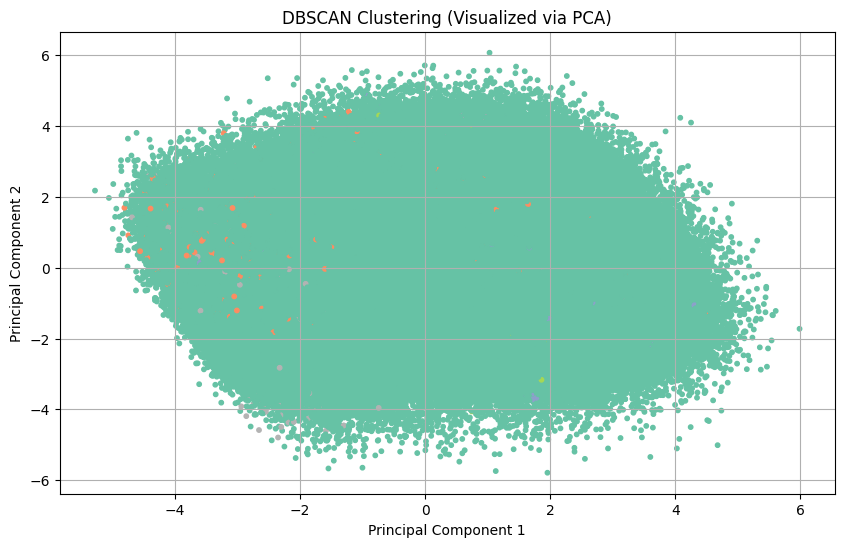

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=29)
X_pca = pca.fit_transform(X_scaled)

dbscan = DBSCAN(eps=2, min_samples=5)
try:
    dbscan_labels = dbscan.fit_predict(X_pca)
except Exception as e:
    print("DBSCAN failed:", e)

plt.figure(figsize=(10,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='Set2', s=10)
plt.title('DBSCAN Clustering (Visualized via PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

## eps= 3.0-3.5

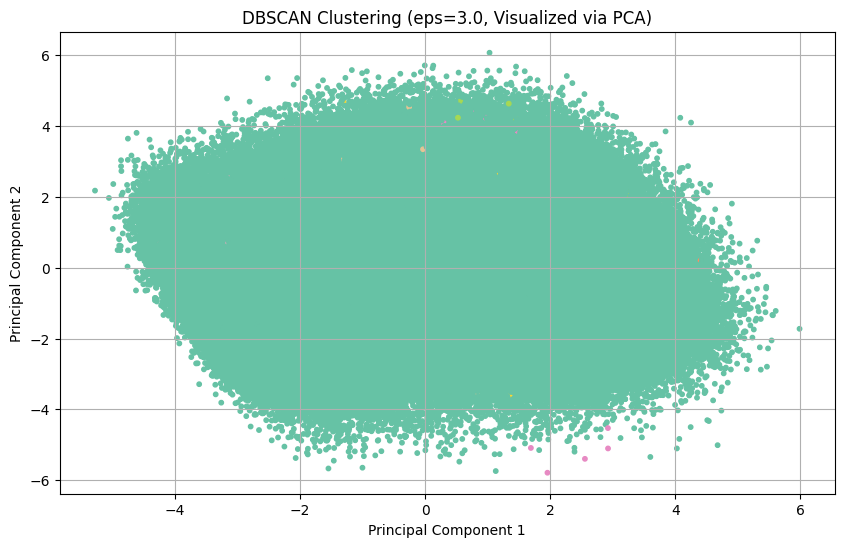

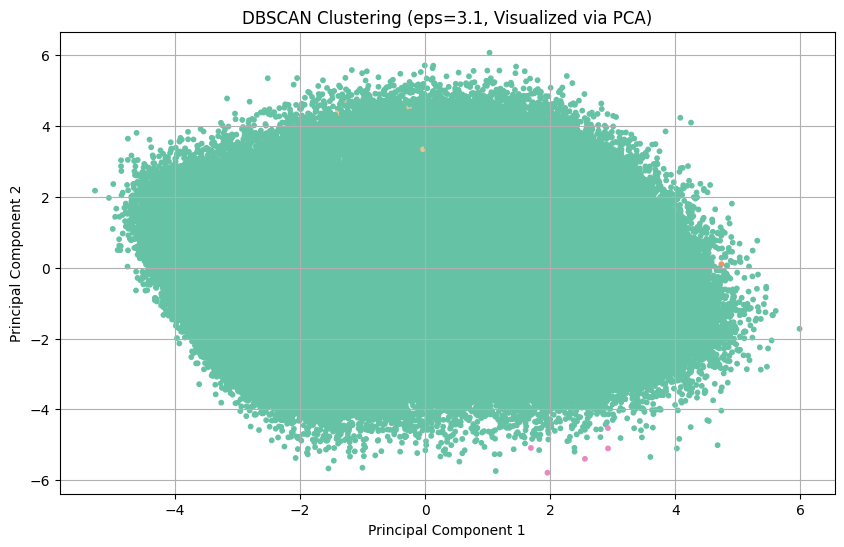

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

eps_values = [3.0, 3.1, 3.2, 3.3, 3.4, 3.5]
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    try:
        dbscan_labels = dbscan.fit_predict(X_pca)
        plt.figure(figsize=(10, 6))
        plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='Set2', s=10)
        plt.title(f'DBSCAN Clustering (eps={eps}, Visualized via PCA)')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.grid(True)
        plt.show()
    except Exception as e:
        print(f"DBSCAN failed for eps={eps}:", e)


# Gaussian Mixture Model

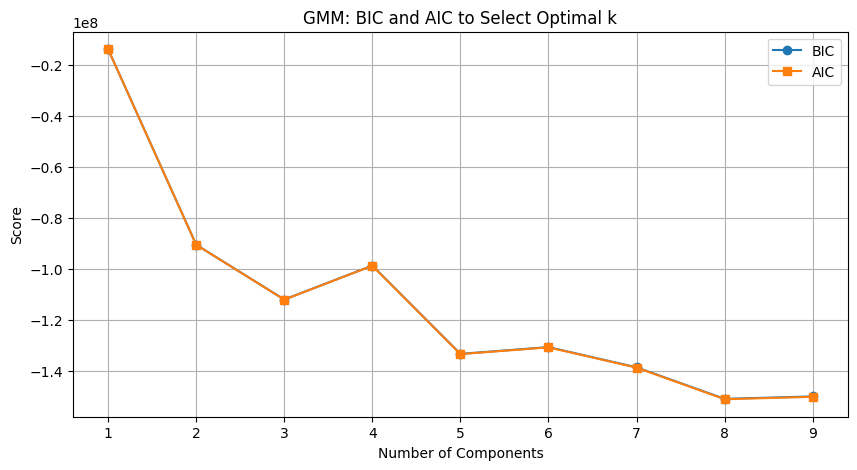

In [ ]:
from sklearn.mixture import GaussianMixture

bic = []
aic = []
K = range(1, 10)

for k in K:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X_scaled)
    bic.append(gmm.bic(X_scaled))
    aic.append(gmm.aic(X_scaled))

plt.figure(figsize=(10,5))
plt.plot(K, bic, label='BIC', marker='o')
plt.plot(K, aic, label='AIC', marker='s')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.title('GMM: BIC and AIC to Select Optimal k')
plt.legend()
plt.grid(True)
plt.show()

Either K=3 or K=5

## K=3

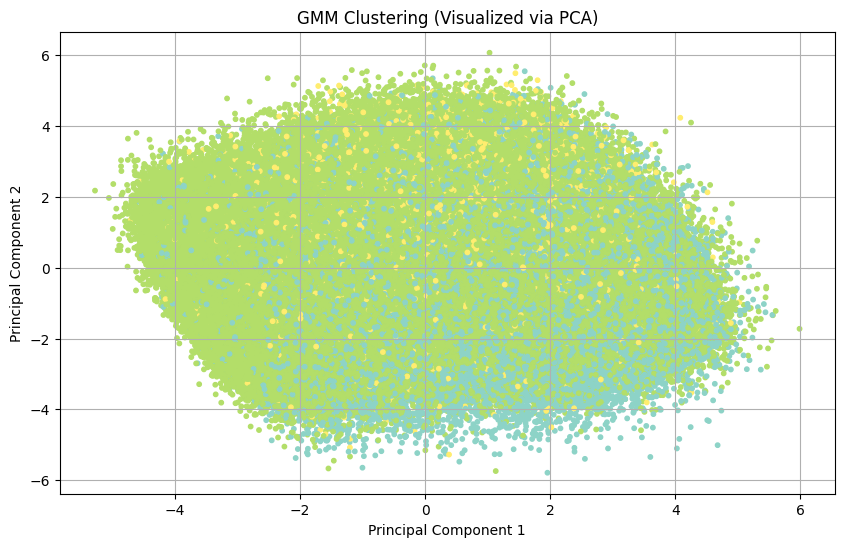

In [ ]:
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

plt.figure(figsize=(10,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='Set3', s=10)
plt.title('GMM Clustering (Visualized via PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

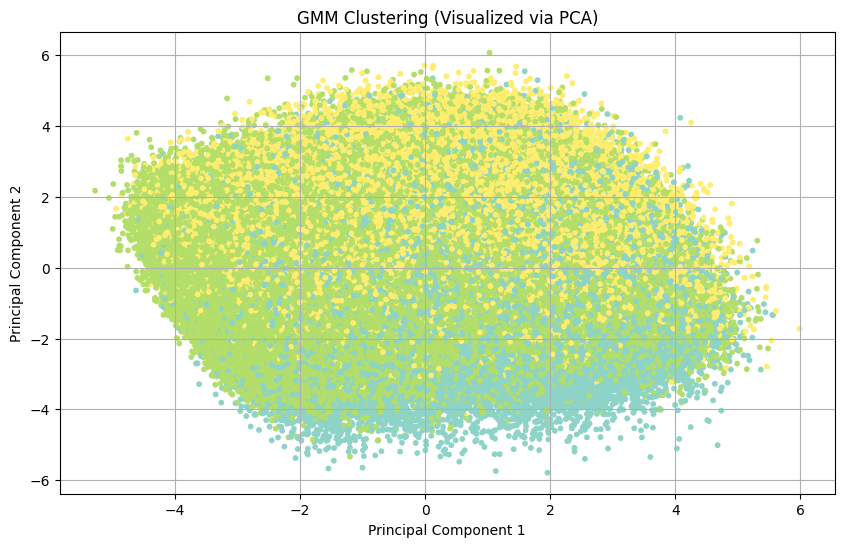

In [ ]:
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X_pca)

plt.figure(figsize=(10,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='Set3', s=10)
plt.title('GMM Clustering (Visualized via PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

## K=5

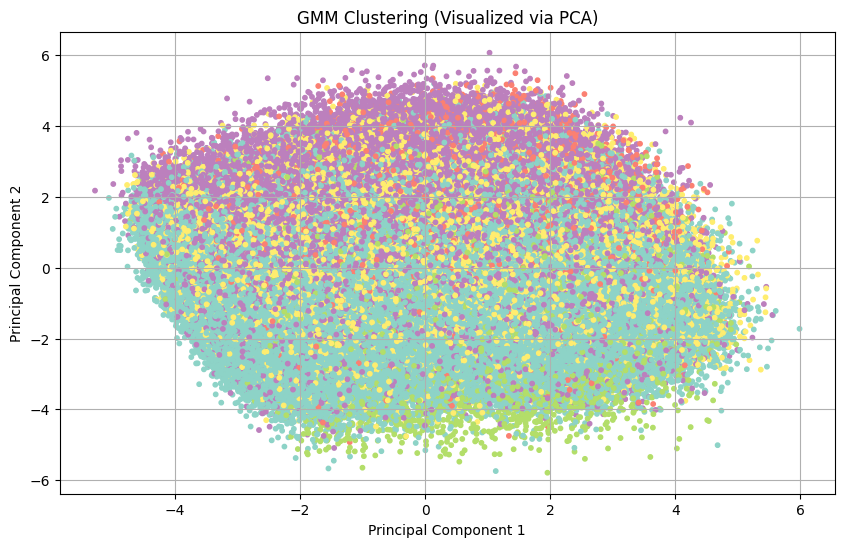

In [ ]:
gmm = GaussianMixture(n_components=5, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

plt.figure(figsize=(10,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='Set3', s=10)
plt.title('GMM Clustering (Visualized via PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Silhouette Scores

In [7]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

from sklearn.utils import resample

sample_indices = np.random.RandomState(seed=42).choice(X_pca.shape[0], size=20000, replace=False)
X_pca_sample = X_pca[sample_indices]

dbscan = DBSCAN(eps=3.2, min_samples=5)
dbscan_labels_sample = dbscan.fit_predict(X_pca_sample)

gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)


def silhouette_sample_score(X, labels, model_name):
    mask = labels != -1  # exclude noise if present
    X_valid = X[mask]
    labels_valid = np.array(labels)[mask]

    if len(X_valid) > 10000:
        X_valid, labels_valid = resample(X_valid, labels_valid, n_samples=10000, random_state=42)

    score = silhouette_score(X_valid, labels_valid)
    print(f"Silhouette Score ({model_name}): {score:.4f}")

silhouette_sample_score(X_scaled, kmeans_labels, "K-Means")
silhouette_sample_score(X_pca_sample, dbscan_labels_sample, "DBSCAN (Sampled PCA)")
silhouette_sample_score(X_scaled, gmm_labels, "GMM")


Silhouette Score (K-Means): 0.0677
Silhouette Score (DBSCAN (Sampled PCA)): -0.0915
Silhouette Score (GMM): 0.0830


In [8]:
np.save("/content/drive/My Drive/Professional/Portfolio/Fraud Detection/Data/Preprocessed/Variant II/gmm_labels_variantiv.npy", gmm_labels)